<a href="https://colab.research.google.com/github/SoramKim/Machine-Learning-Study/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read data
df = pd.read_csv('data05_boston.csv')


In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


simple linear regression

In [ ]:
# simple linear regression
from sklearn.linear_model import LinearRegression
X = df[ ['lstat'] ]
y = df['medv']


In [ ]:
lm = LinearRegression()
lm.fit(X,y)
lm.coef_  # coefficients
lm.intercept_ # intercepter
yhat = lm.predict(X) # prediction

In [ ]:
r2 = lm.score(X,y) # R2
r2

0.5441462975864797

In [ ]:
rmse = np.sqrt(((y-yhat)**2).mean())
rmse

6.203464131426422

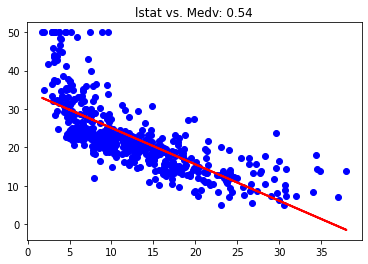

In [ ]:
plt.plot(X,y,'bo')
plt.plot(X,yhat,'r',linewidth=2)
plt.title('%s vs. Medv: %.2f' % ('lstat',r2))
plt.show()

multiple linear regression

In [ ]:
# multiple linear regression
X = df.iloc[:,0:13]
y = df['medv']
lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

In [ ]:
lm.coef_  # coefficients

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [ ]:
lm.intercept_ # intercepter

36.45948838508978

In [ ]:
yhat = lm.predict(X) # prediction
yhat

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

In [ ]:
r2 = lm.score(X,y) # R2
rmse = np.sqrt(((y-yhat)**2).mean())

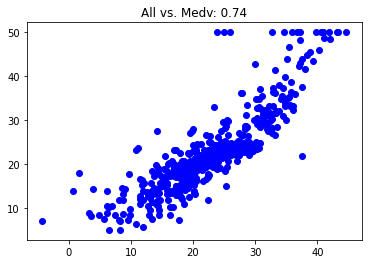

In [ ]:
plt.plot(yhat,y,'bo')
plt.title('All vs. Medv: %.2f' % r2)
plt.show()

using StatsModel

In [ ]:
# using StatsModel
import statsmodels.api as sm
X = df.iloc[:,0:13]
X = sm.add_constant(X)
y = df['medv']
f = sm.OLS(y,X)
r = f.fit()
print(r.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          6.72e-135
Time:                        06:09:07   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
yhat = r.predict(X)
np.sqrt( ((yhat-y)**2).mean() )


4.679191295697283

training vs. test set

In [ ]:
# training vs. test set
X = df.iloc[:,0:13]
y = df['medv']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.5,random_state=0) 

lm = LinearRegression()
lm.fit(xtrain,ytrain)

yhat_train = lm.predict(xtrain)
rmse_train = np.sqrt( ((ytrain-yhat_train)**2).mean() )
r2_train = lm.score(xtrain,ytrain)
print(rmse_train,r2_train)

yhat_test = lm.predict(xtest)
rmse_test = np.sqrt( ((ytest-yhat_test)**2).mean() )
r2_test = lm.score(xtest,ytest)
print(rmse_test,r2_test)



4.430389222526522 0.7877808902724839
5.030075721681159 0.6662719929919436
